In [969]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [970]:
#Read data
primary_data = pd.read_csv('/Users/phuocdang/SIT307/MushroomDataset/1987_data_no_miss.csv',sep = ';')
secondary_data = pd.read_csv('/Users/phuocdang/SIT307/MushroomDataset/secondary_data_no_miss.csv', sep = ';')

In [971]:
#Explore the primary data
primary_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [972]:
#Check primary dataset
primary_data.shape

(8124, 23)

In [973]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [974]:
#check if there is null data
primary_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [975]:
#Encode data to replace categorical data by numerical data
labelencoder=LabelEncoder()
for column in primary_data.columns:
    primary_data[column] = labelencoder.fit_transform(primary_data[column])
primary_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


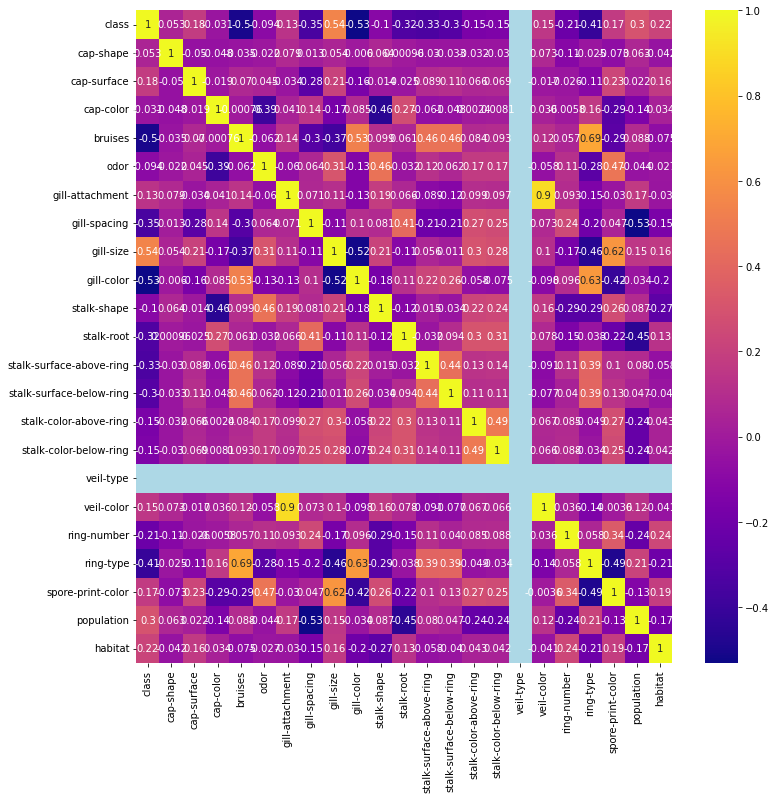

In [976]:
#Display correlation matrix of the primary data
corr_matrix  = primary_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
color = plt.get_cmap('plasma')
color.set_bad('lightblue')  
sns.heatmap(corr_matrix, annot=True, cmap=color, annot_kws={"size": 10})
plt.show()

In [977]:
#Eliminate veil-type column since it does not contribute to the dataset
primary_data.drop('veil-type', axis = 1, inplace=True)

In [978]:
#Get feature and target set from primary data
X_primary = primary_data.drop('class', axis = 1)
y_primary = primary_data['class']

In [979]:
#Explore secondary dataset
secondary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [980]:
secondary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [981]:
secondary_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.746893,6.588775,12.155013
std,5.262972,3.362591,9.989620
min,0.410000,0.000000,0.000000
25%,3.490000,4.640000,5.200000
50%,5.890000,5.960000,10.180000
75%,8.540000,7.760000,16.600000
max,61.580000,35.790000,100.830000


In [982]:
#Check if there are missing values
secondary_data.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [983]:
#Encode nominal data
labelencoder=LabelEncoder()
for column in secondary_data.columns:
    secondary_data[column] = labelencoder.fit_transform(secondary_data[column])
secondary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,84,6,2,11,0,1,0,10,394,119,12,0,1,0,0
1,0,990,2,1,0,0,0,0,0,358,1890,11,1,1,0,0
2,1,50,6,2,7,0,0,0,7,349,61,4,0,1,0,2
3,1,385,6,8,7,0,6,0,10,345,598,11,0,1,0,0
4,0,266,2,7,10,0,1,1,10,157,464,11,0,1,4,0


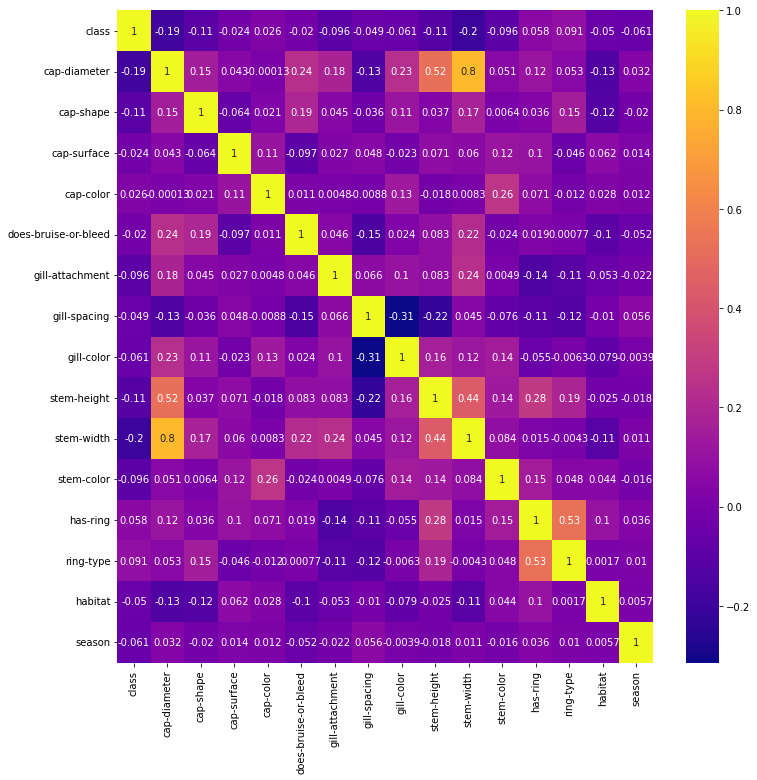

In [984]:
#Correlation matrix of the secondary dataset
sec_corr_matrix  = secondary_data.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sec_corr_matrix, annot=True, cmap='plasma', annot_kws={"size": 10})
plt.show()

In [985]:
X_secondary = secondary_data.drop('class', axis = 1)
y_secondary = secondary_data['class']

In [986]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score
from sklearn.model_selection import KFold 

In [987]:
#Primary data - Accuracy score using Random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_primary, y_primary)
rf_result = cross_validate(estimator=rf_model,X= X_primary, y = y_primary, cv = 5, scoring = ['accuracy'])
rf_accuracy_primary = rf_result['test_accuracy']

In [988]:
#Primary data - Accuracy score using Logistic Regression model
logit_model = LogisticRegression(max_iter=10000)
logit_model.fit(X_primary, y_primary)
logit_result = cross_validate(estimator=logit_model,X= X_primary, y = y_primary, cv = 5, scoring = ['accuracy'])
logit_accuracy_primary = logit_result['test_accuracy']

In [989]:
#Primary data - Accuarcy score using Naiv-Bayes model
NB_model = GaussianNB()
NB_model.fit(X_primary, y_primary)
NB_result = cross_validate(estimator=NB_model, X=X_primary, y=y_primary,cv = 5, scoring=['accuracy'])
NB_accuracy_primary = NB_result['test_accuracy']

In [990]:
#Primary data - Accuarcy score using Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_primary, y_primary)
lda_result = cross_validate(estimator=lda_model, X=X_primary, y = y_primary, cv = 5, scoring = 'accuracy')
lda_accuracy_primary = lda_result['test_score']

In [991]:
#Primary data - Accuracy scores from the 4 models
labels = ['Naiv-Bayes','Logit-Reg','LDA','RF' ]
data = np.array([NB_accuracy_primary, logit_accuracy_primary,lda_accuracy_primary,rf_accuracy_primary])
df = pd.DataFrame(data.T, columns=labels)
df

,Naiv-Bayes,Logit-Reg,LDA,RF
0,0.785846,0.769846,0.732923,0.842462
1,0.972923,0.987692,0.980923,1.000000
2,0.790154,0.875692,0.805538,0.998769
3,0.603077,0.998769,0.997538,1.000000
4,0.494458,0.743227,0.671182,0.631773


In [992]:
#Secondary data - Accuracy score using Random forest model
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(X_secondary, y_secondary)
rf_result_2 = cross_validate(estimator=rf_model_2, X= X_secondary_test, y = y_secondary_test, cv = 5, scoring = ['accuracy'])
rf_accuracy_secondary = rf_result_2['test_accuracy']

In [993]:
#Secondary data - Accuracy score using Logistic Regression model
logit_model_2 = LogisticRegression(max_iter=10000)
logit_model_2.fit(X_secondary, y_secondary)
logit_result_2 = cross_validate(estimator=logit_model_2, X= X_secondary_test, y = y_secondary_test, cv = 5, scoring = ['accuracy'])
logit_accuracy_secondary = logit_result_2['test_accuracy']

In [994]:
#Secondary data - Accuarcy score using Naiv-Bayes model
NB_model_2 = GaussianNB()
NB_model_2.fit(X_secondary, y_secondary)
NB_result_2 = cross_validate(estimator=NB_model_2, X=X_secondary_test, y=y_secondary_test,cv = 5, scoring=['accuracy'])
NB_accuracy_secondary = NB_result_2['test_accuracy']

In [995]:
#Secondary data - Accuarcy score using Linear Discriminant Analysis
lda_model_2 = LinearDiscriminantAnalysis()
lda_model_2.fit(X_secondary, y_secondary)
lda_result_2 = cross_validate(estimator=lda_model_2, X=X_secondary_test, y = y_secondary_test, cv = 5, scoring = 'accuracy')
lda_accuracy_secondary = lda_result_2['test_score']

In [996]:
#Secondary data - Accuracy scores from the 4 models
data_2 = np.array([NB_accuracy_secondary,logit_accuracy_secondary,lda_accuracy_secondary,rf_accuracy_secondary])
df_2 = pd.DataFrame(data_2.T, columns=labels)
df_2

,Naiv-Bayes,Logit-Reg,LDA,RF
0,0.611134,0.635694,0.640196,1.000000
1,0.629554,0.657388,0.653295,0.999591
2,0.613181,0.638150,0.641015,1.000000
3,0.620958,0.636512,0.636922,1.000000
4,0.612203,0.646192,0.642097,1.000000


In [997]:
#Function to calculate f2 score
def kfold_f2(model, X, y):
    k = 5
    kf = KFold(n_splits=k)
    f2_score = []

    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index],X.iloc[test_index]
        y_train , y_test = y[train_index] , y[test_index]
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        acc = fbeta_score(y_test, pred, beta=2)
        f2_score.append(acc)
    return f2_score

In [998]:
#Primary data - F2 score from the 4 models
rf_model_3 = RandomForestClassifier()
lda_model_3 = LinearDiscriminantAnalysis()
logit_model_3 = LogisticRegression(max_iter=10000)
NB_model_3 = GaussianNB()

rf_f2_primary = kfold_f2(rf_model_3, X_primary, y_primary)
lda_f2_primary = kfold_f2(lda_model_3, X_primary, y_primary)
logit_f2_primary = kfold_f2(logit_model_3, X_primary, y_primary)
nb_f2_primary = kfold_f2(NB_model_3, X_primary, y_primary)

data_3 = np.array([nb_f2_primary, logit_f2_primary,lda_f2_primary,rf_f2_primary])
df_3 = pd.DataFrame(data_3.T, columns=labels)
df_3

,Naiv-Bayes,Logit-Reg,LDA,RF
0,0.000000,0.550902,0.642905,1.000000
1,0.275126,0.897010,0.836139,1.000000
2,0.899452,0.938209,0.967167,1.000000
3,0.834600,0.865370,0.776201,0.992871
4,0.960816,0.963056,0.968964,0.993906


In [999]:
#Secondary data - F2 score from the 4 models
rf_model_4 = RandomForestClassifier()
lda_model_4 = LinearDiscriminantAnalysis()
logit_model_4 = LogisticRegression(max_iter=10000)
NB_model_4 = GaussianNB()

rf_f2_secondary = kfold_f2(rf_model_4, X_secondary, y_secondary)
lda_f2_secondary = kfold_f2(lda_model_4, X_secondary, y_secondary)
logit_f2_secondary = kfold_f2(logit_model_4, X_secondary, y_secondary)
nb_f2_secondary = kfold_f2(NB_model_4, X_secondary, y_secondary)

data_4 = np.array([nb_f2_secondary, logit_f2_secondary,lda_f2_secondary,rf_f2_secondary])
df_4 = pd.DataFrame(data_4.T, columns=labels)
df_4

,Naiv-Bayes,Logit-Reg,LDA,RF
0,0.647877,0.720689,0.723201,0.999971
1,0.647005,0.722544,0.724503,1.000000
2,0.644491,0.723456,0.727223,0.999881
3,0.648183,0.732667,0.736572,0.999824
4,0.639810,0.724450,0.726090,1.000000


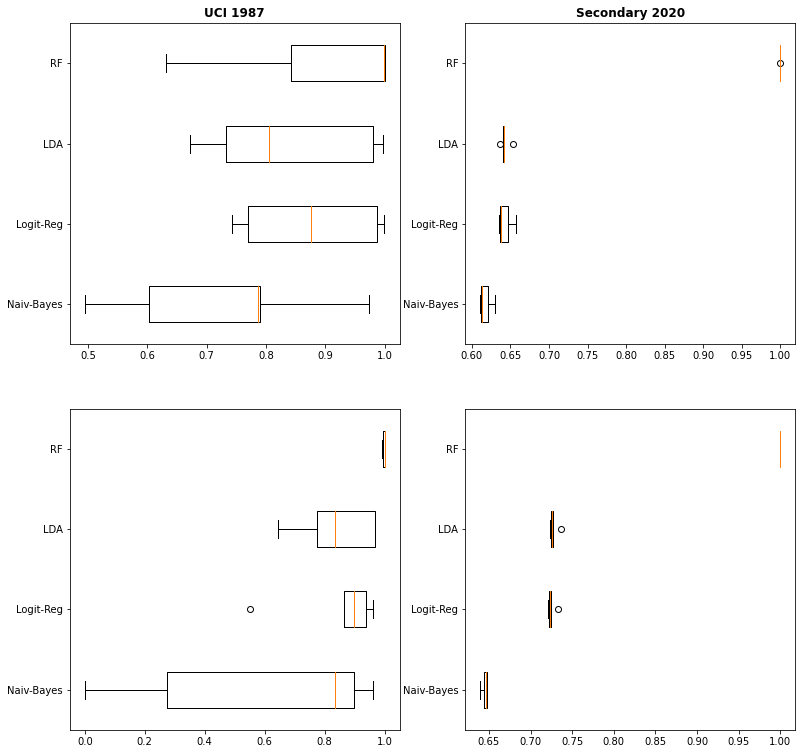

In [1000]:
#Plot the four model scores together
fig, axs = plt.subplots(2, 2, figsize=(13, 13))

axs[0, 0].boxplot(df, labels=labels, vert=False)
axs[0,0].set_title('UCI 1987', fontweight = 'bold')
axs[0, 1].boxplot(df_2, labels=labels, vert=False)
axs[0,1].set_title('Secondary 2020', fontweight = 'bold')
axs[1, 0].boxplot(df_3, labels=labels, vert=False)
axs[1, 1].boxplot(df_4, labels=labels, vert=False)

plt.show()

In [1001]:
#Plot ROC curve for the 4 models
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_secondary, y_secondary, test_size=0.3, random_state=1)

#Calculate True Positive Rate, False Positive Rate and AUC score for Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf_probs)
auc_rf = round(roc_auc_score(y_test, rf_probs),2)

#Calculate True Positive Rate, False Positive Rate and AUC score for Naiv-Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_probs = nb_model.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, nb_probs)
auc_nb = round(roc_auc_score(y_test, nb_probs),2)

#Calculate True Positive Rate, False Positive Rate and AUC score for Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_probs = lda_model.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_test, lda_probs)
auc_lda = round(roc_auc_score(y_test, lda_probs),2)

#Calculate True Positive Rate, False Positive Rate and AUC score for Linear Logistic model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:,1]
fpr_log, tpr_log, threshold_log = roc_curve(y_test, log_probs)
auc_log = round(roc_auc_score(y_test, log_probs),2)


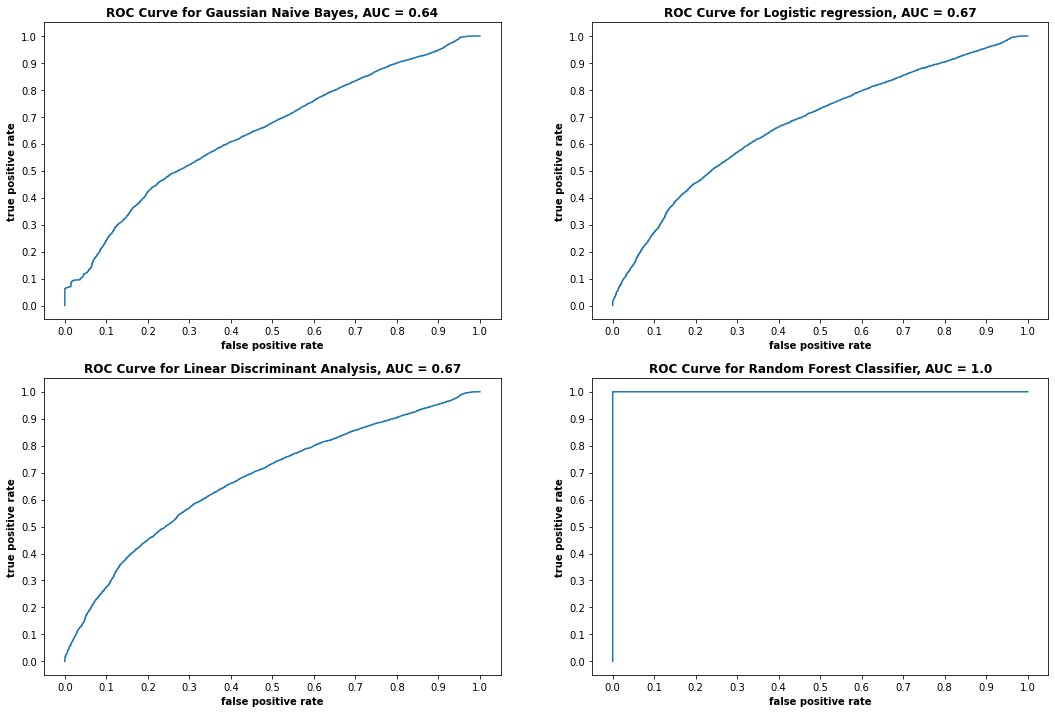

In [1002]:
#Plot 4 ROC curves altogether
fig, ax = plt.subplots(2 ,2, figsize = (18,12))

ax[0,0].plot(fpr_nb, tpr_nb)
ax[0,0].set_xlabel('false positive rate', fontweight = 'bold')
ax[0,0].set_ylabel('true positive rate', fontweight = 'bold')
ax[0,0].set_xticks(np.arange(0,1.1,0.1))
ax[0,0].set_yticks(np.arange(0,1.1,0.1))
ax[0,0].set_title('ROC Curve for ' + 'Gaussian Naive Bayes, AUC = ' + str(auc_nb), fontweight = 'bold')

ax[0,1].plot(fpr_log, tpr_log)
ax[0,1].set_xlabel('false positive rate', fontweight = 'bold')
ax[0,1].set_ylabel('true positive rate', fontweight = 'bold')
ax[0,1].set_xticks(np.arange(0,1.1,0.1))
ax[0,1].set_yticks(np.arange(0,1.1,0.1))
ax[0,1].set_title('ROC Curve for ' + 'Logistic regression, AUC = ' + str(auc_log), fontweight = 'bold')

ax[1,0].plot(fpr_lda, tpr_lda)
ax[1,0].set_xlabel('false positive rate', fontweight = 'bold')
ax[1,0].set_ylabel('true positive rate', fontweight = 'bold')
ax[1,0].set_xticks(np.arange(0,1.1,0.1))
ax[1,0].set_yticks(np.arange(0,1.1,0.1))
ax[1,0].set_title('ROC Curve for ' + 'Linear Discriminant Analysis, AUC = ' + str(auc_lda), fontweight = 'bold')

ax[1,1].plot(fpr_rf, tpr_rf)
ax[1,1].set_xlabel('false positive rate', fontweight = 'bold')
ax[1,1].set_ylabel('true positive rate', fontweight = 'bold')
ax[1,1].set_xticks(np.arange(0,1.1,0.1))
ax[1,1].set_yticks(np.arange(0,1.1,0.1))
ax[1,1].set_title('ROC Curve for ' + 'Random Forest Classifier, AUC = ' + str(auc_rf), fontweight = 'bold')

plt.show()